# Rappresentazioni grafiche

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importiamo un dataset d'esempio sui dati del titanic con seaborn.

Citazione:Hind, Philip. Encyclopedia Titanica.

In [2]:
titanic=sns.load_dataset("titanic")

In [3]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


pclass-> classe del biglietto

sibsp -> numero di fratelli/sorelle/coniugi

parch -> numero genitori/figli

deck -> ponte

# Otteniamo le informazioni di statistica monovariata di base

In [5]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Otteniamo le informazioni di statistica bivariata di base

In [6]:
titanic.corr(numeric_only=True)
#titanic.corr(numeric_only=True, method='spearman')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [7]:
titanic.corr(numeric_only=True)[["survived"]].sort_values(by="survived",ascending=False).\
        reset_index().query("index != 'survived'")

,index,survived
1,fare,0.257307
2,parch,0.081629
3,sibsp,-0.035322
4,age,-0.077221
5,alone,-0.203367
6,pclass,-0.338481
7,adult_male,-0.557080


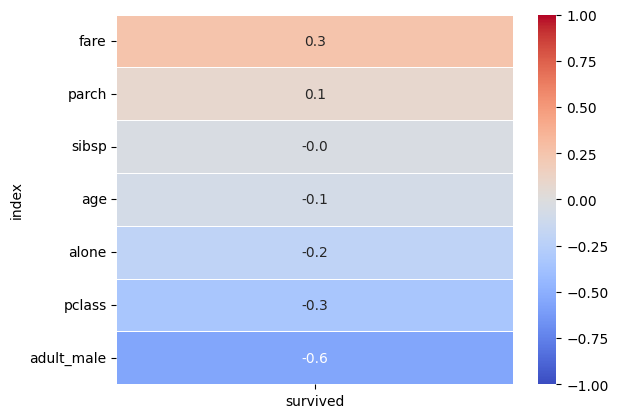

In [8]:
g = sns.heatmap(data = titanic.corr(numeric_only=True)[["survived"]].sort_values(by="survived",ascending=False).sort_values(by="survived",ascending=False).reset_index().query("index != 'survived'").set_index("index"),
                vmin=-1, 
                vmax=1, 
                annot=True, 
                fmt=".1f", 
                linewidth=.5, 
                cmap='coolwarm')

# Rappresentiamo una variabile nominale

In [9]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


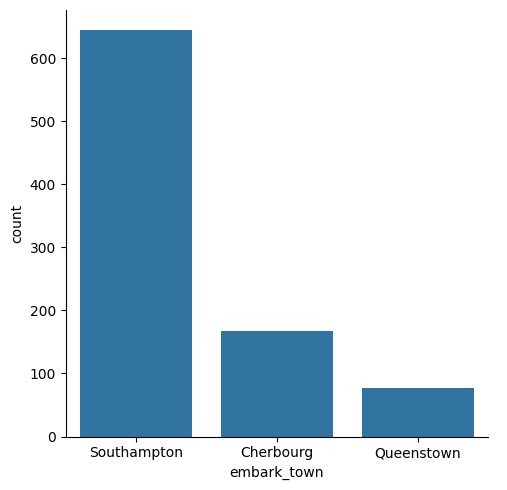

In [10]:
g = sns.catplot(data=titanic, x="embark_town", kind="count")

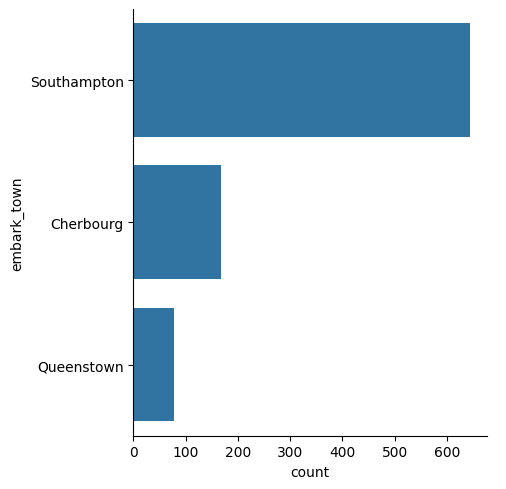

In [11]:
g = sns.catplot(data=titanic, y="embark_town", kind="count")

# Rappresentiamo due variabili nominali

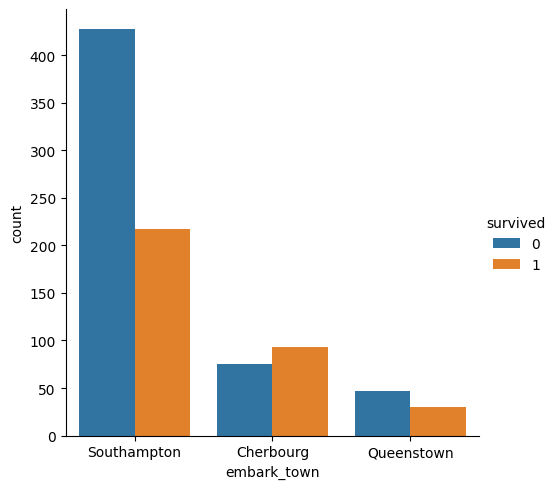

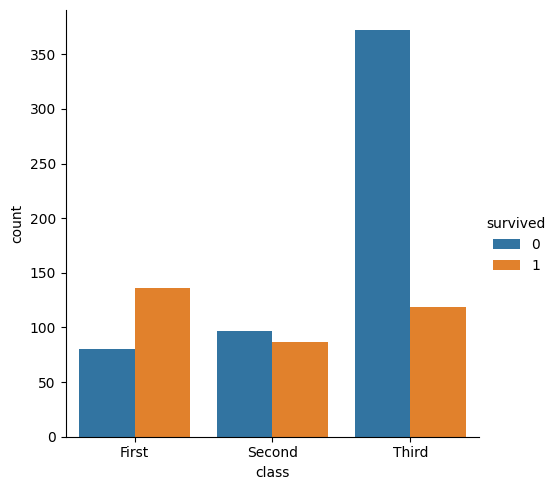

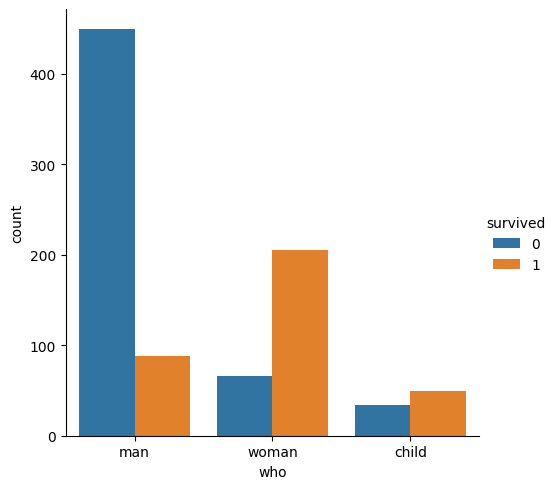

In [12]:
for colonna in ["embark_town","class","who"]:
    g = sns.catplot(
        data=titanic, x=colonna, hue="survived", kind="count"
        )

# Rappresentiamo una variabile quantitativa

## Boxplot

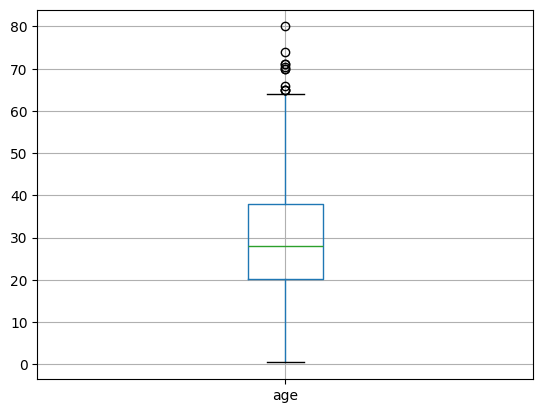

In [13]:
g = titanic.boxplot(column = "age")

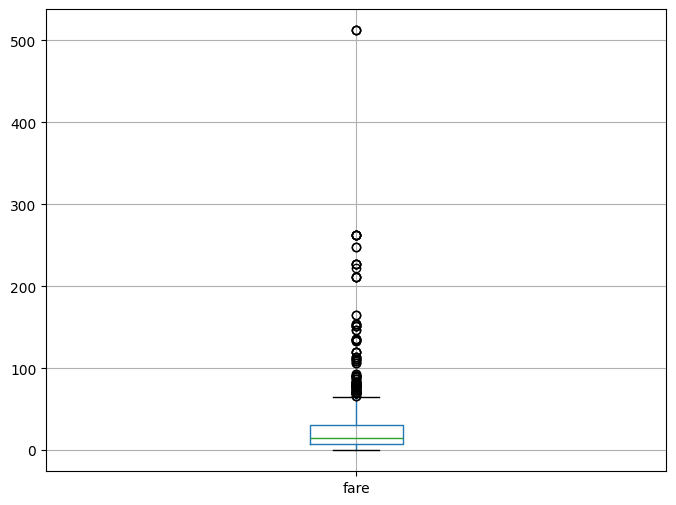

In [14]:
g = titanic.boxplot(column = "fare", figsize = (8,6))

In [15]:
titanic.query("fare > 500")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


## Istogramma

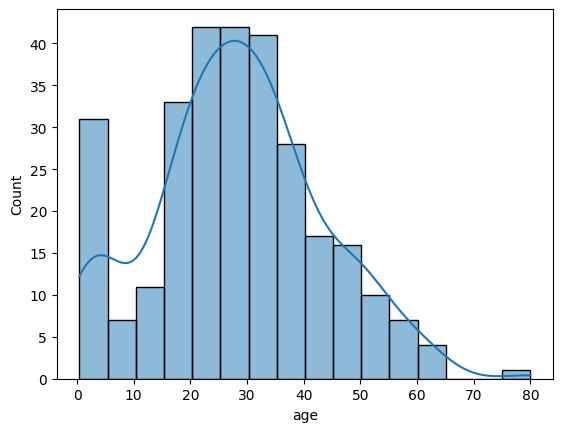

In [16]:
g = sns.histplot(data=titanic.query("survived==1"), x="age",kde=True)

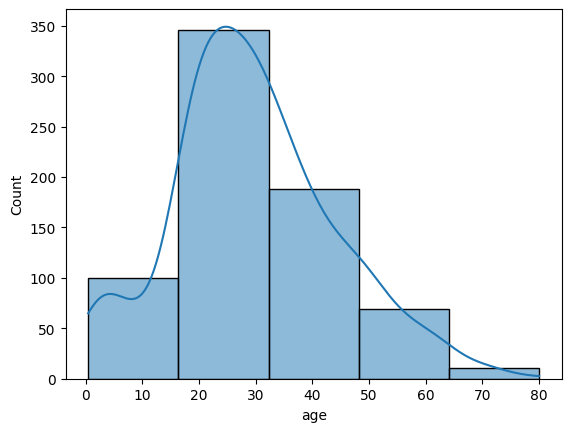

In [17]:
g = sns.histplot(data=titanic, x="age",kde=True,bins=5)

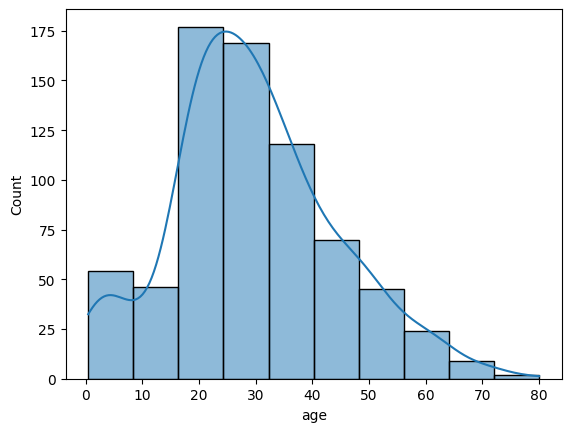

In [18]:
g = sns.histplot(data=titanic, x="age",kde=True,binwidth = 8)

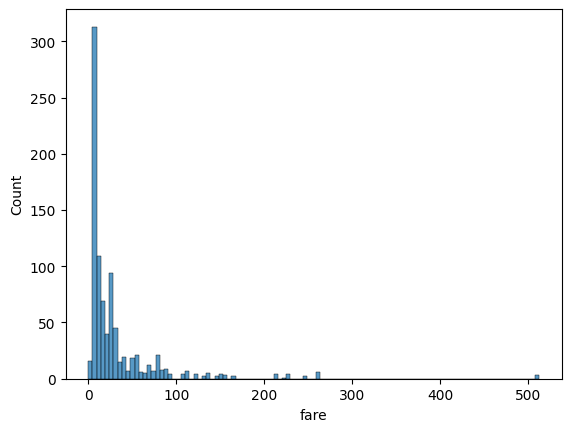

In [19]:
g = sns.histplot(data=titanic, x="fare")

# Rappresentiamo due variabili quantitative

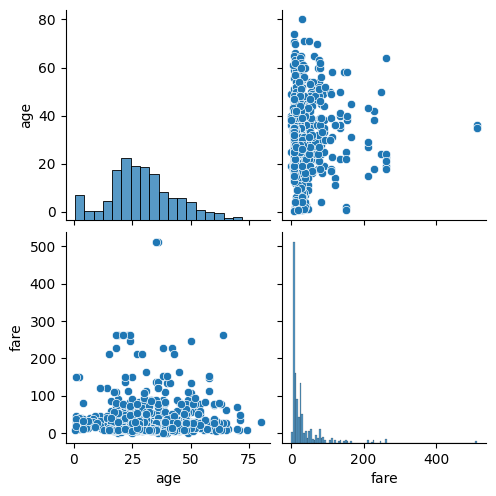

In [20]:
g = sns.pairplot(data=titanic[["age","fare"]])

## Diagramma a dispersione

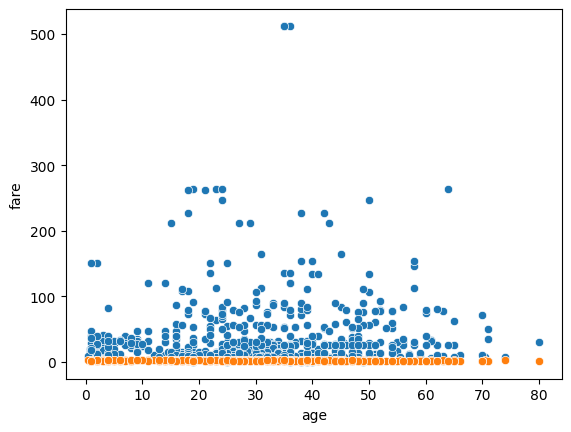

In [21]:
for colonna in ["fare","pclass"]: 
    g = sns.scatterplot(data=titanic, x="age", y=colonna )

## Boxplot

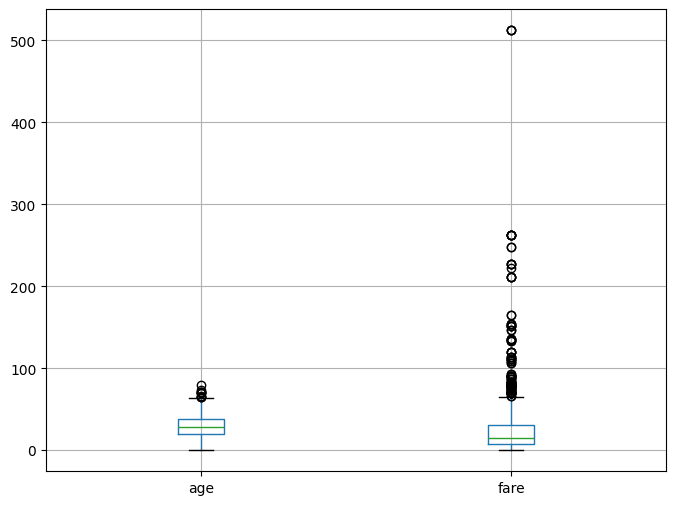

In [22]:
g = titanic.boxplot(column = ["age","fare"], figsize = (8,6))

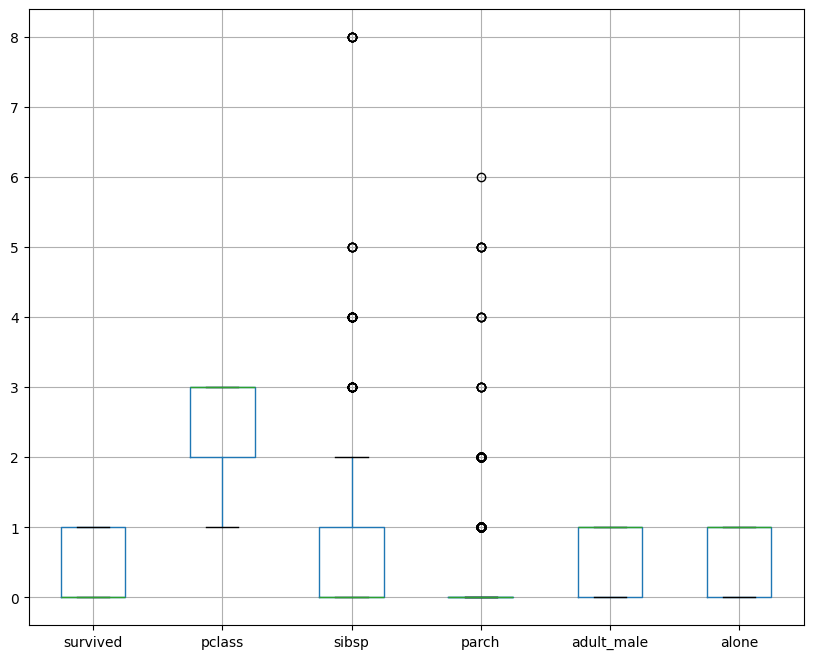

In [23]:
g = titanic.drop(["fare","age"],axis=1).boxplot(figsize = (10,8))

## Istogramma

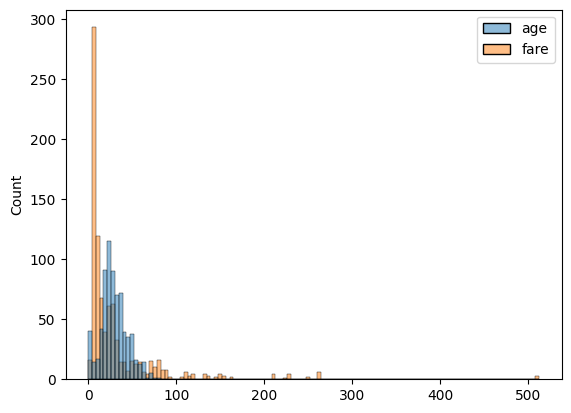

In [24]:
g = sns.histplot(data=titanic[["age","fare"]])

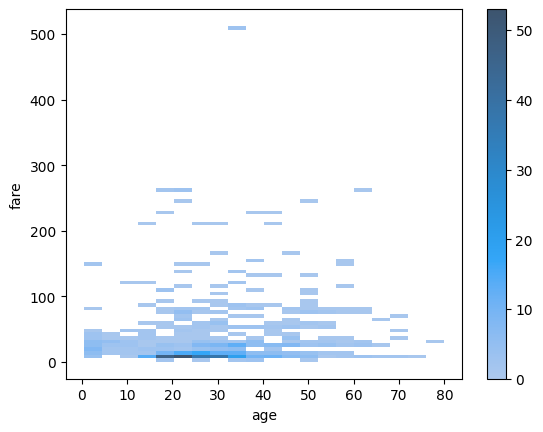

In [25]:
g = sns.histplot(data=titanic, x="age",y="fare",  cbar=True)

# Rappresentazioni miste

Partendo da qui

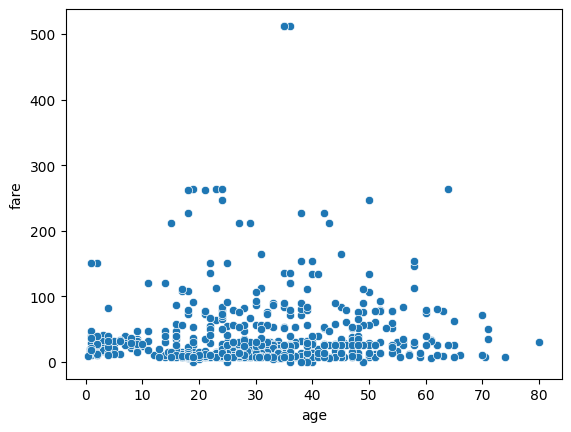

In [26]:
g = sns.scatterplot(data=titanic, x="age", y="fare" )

aggiungiamo una qualitativa nello stesso grafico

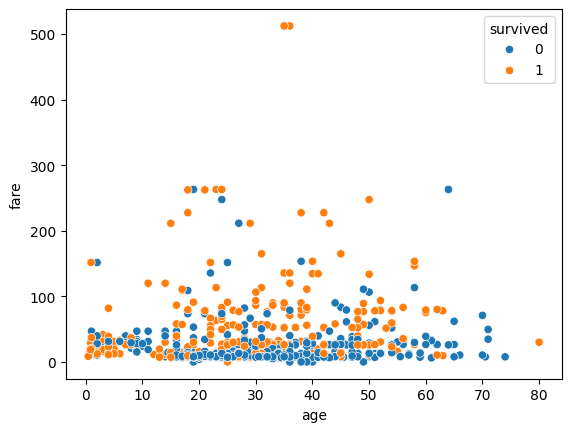

In [27]:
g = sns.scatterplot(data=titanic, x="age", y="fare", hue="survived" )

o splittando in grafico diversi

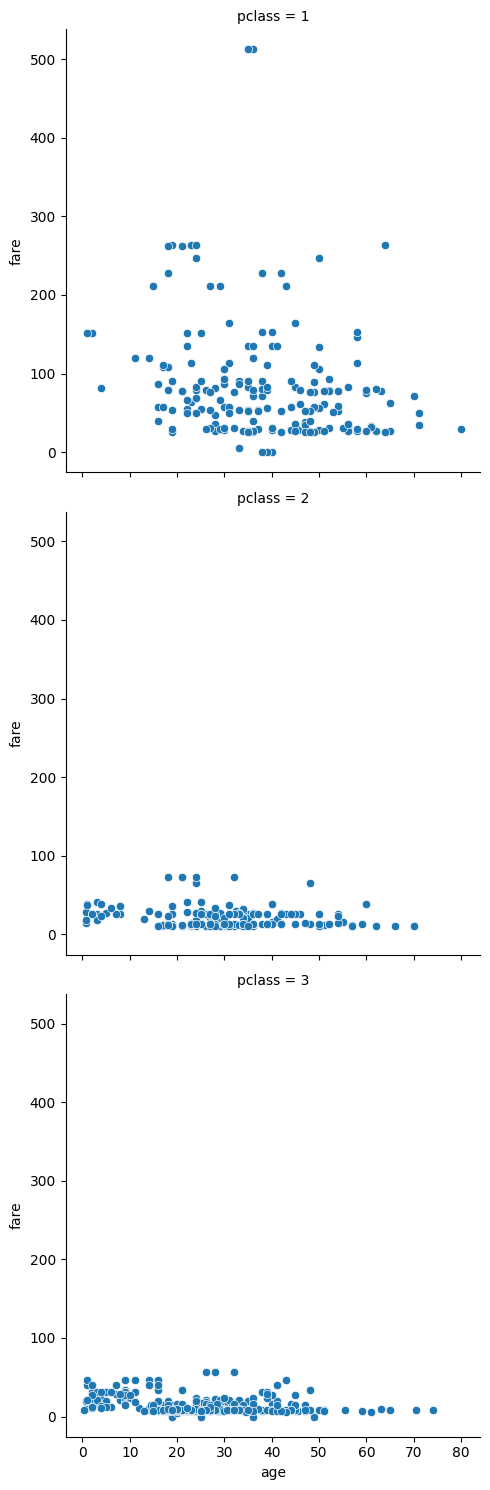

In [28]:
g = sns.relplot(x="age", y="fare", data=titanic, row="pclass")

Partendo da qui

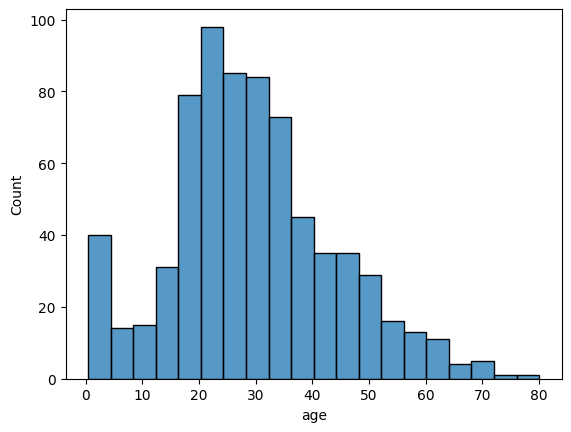

In [29]:
g = sns.histplot(data=titanic, x="age")

aggiungiamo una qualitativa così

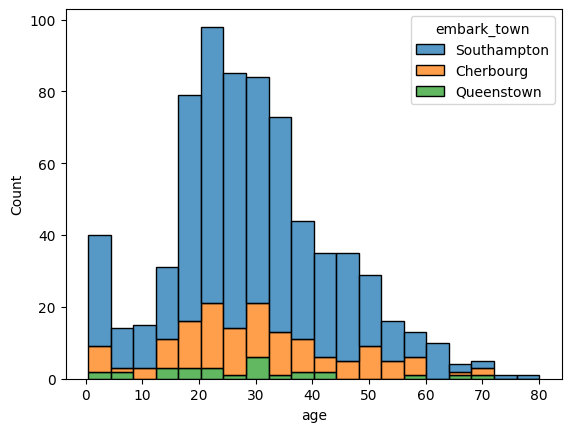

In [30]:
g = sns.histplot(
    data=titanic, x="age", hue="embark_town", multiple="stack"
    )

oppure così

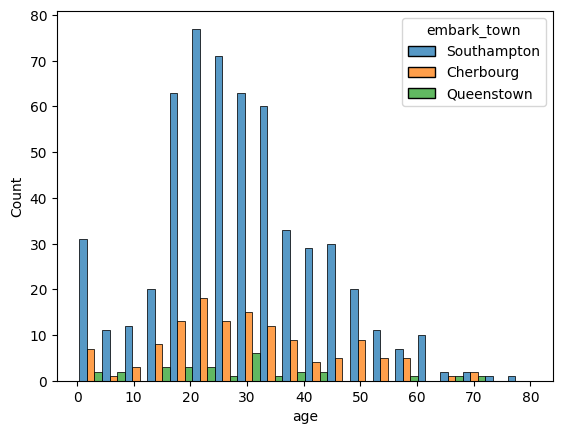

In [31]:
g = sns.histplot(
    data=titanic, x="age", hue="embark_town", multiple="dodge"
    )

o al contrario

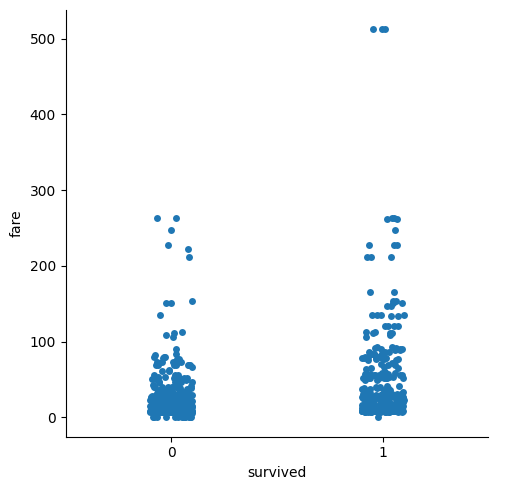

In [32]:
g = sns.catplot(data=titanic, x="survived", y="fare")

o se voglio i box plot



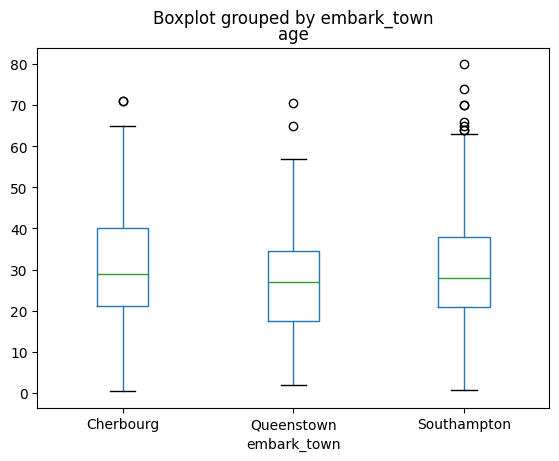

In [33]:
g = titanic.boxplot(by ='embark_town', column =['age'], grid = False)

se invece embark_town fosse una data...

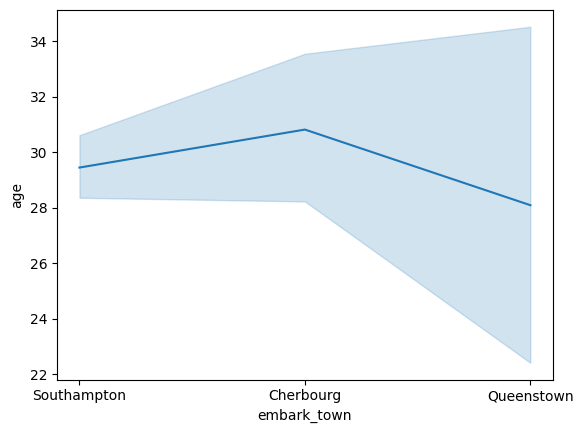

In [34]:
g = sns.lineplot( data=titanic, x="embark_town",  y="age")

# Esercitazione sul dataset penguins

In [35]:
import seaborn as sns
import pandas as pd

Importiamo tramite la libreria seaborn il dataset <b>penguins</b>

Citazione: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

In [36]:
penguins = sns.load_dataset("penguins")

Spiegazione variabili
- species -> variabile target contente la specie del pinguino
- island -> nome dell'isola
- bill length -> lunghezza becco
- bill_depth -> profondità becco
- flipper length -> lunghezza pinna
- body mass -> massa corporea
- sex -> sesso

In [37]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [38]:
penguins[["species"]].drop_duplicates()

,species
0,Adelie
152,Chinstrap
220,Gentoo


Iniziamo a ottenere informazione sui tipi e sul numero di null

In [39]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


e sulla statistica monovariata di base

In [40]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Iniziamo a studiare la distribuzione della variabile target species

In [41]:
penguins.groupby(by="species").size()

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

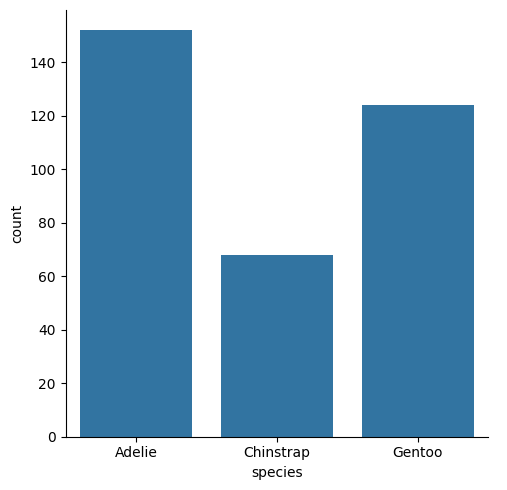

In [42]:
g = sns.catplot(data=penguins, x="species", kind="count")

<b>Conclusioni</b>: abbiamo tre classi distinte, non distribuite uniformemente

## Rappresentare con un opportuno grafico le relazioni tra le variabili species e island

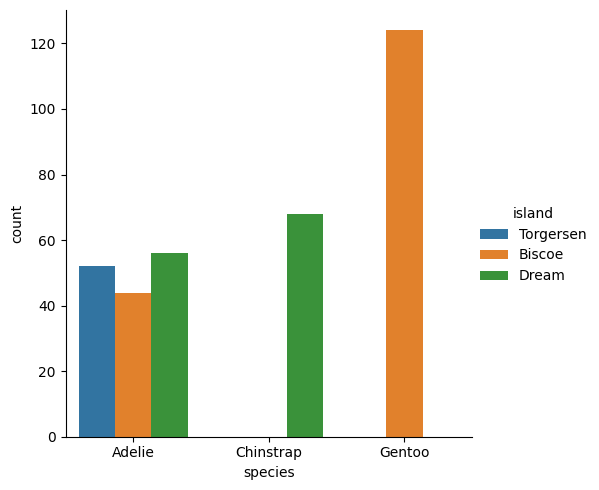

In [43]:
g = sns.catplot(
    data=penguins, x="species", hue="island", kind="count"
    )

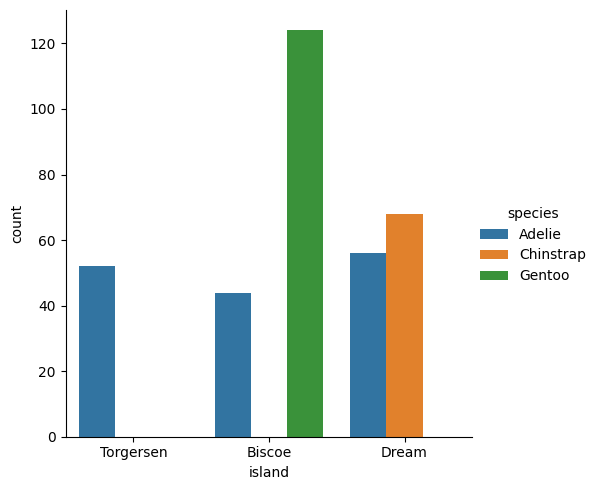

In [44]:
g = sns.catplot(
    data=penguins, x="island", hue="species", kind="count"
    )

<b>Conclusioni</b>:
- la specie Gentoo vive solo sull'isola Biscoe
- la specie Chinstrap vive solo sull'isola Dream
- la specie Adelie vive in modo abbastanza uniforme su tutte e tre le isole

Di conseguenza sull'isola Torgersen vivono solo pingiuini della specie Adelie.
Sulle altre due isole vivono solo due specie alla volta, di cui una è sempre Torgersen

## Rappresentare con un opportuno grafico le relazioni tra le variabili species e il sesso

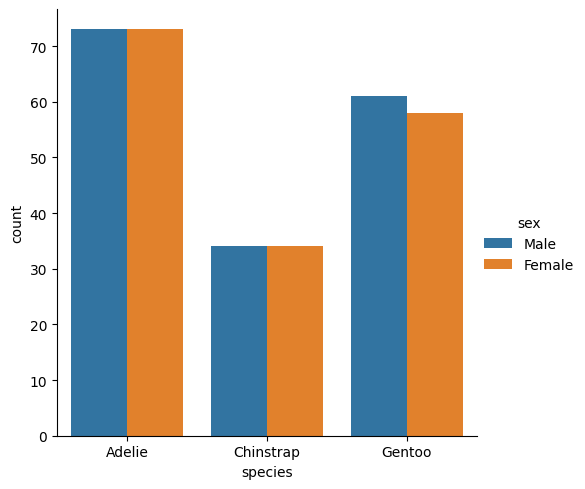

In [45]:
g = sns.catplot(
    data=penguins, x="species", hue="sex", kind="count"
    )

<b>Conclusione</b>: 
Di ogni specie è presente praticamente lo stesso numero di maschi e femmine. Il sesso non sembra dunque una variabile significativa per predire la specie, almeno considerata singolarmente (potrebbe diventare significativa se abbinata ad altre variabili).

## Rappresentare le variabili numeriche per individuare outlier e correlazioni

<Axes: >

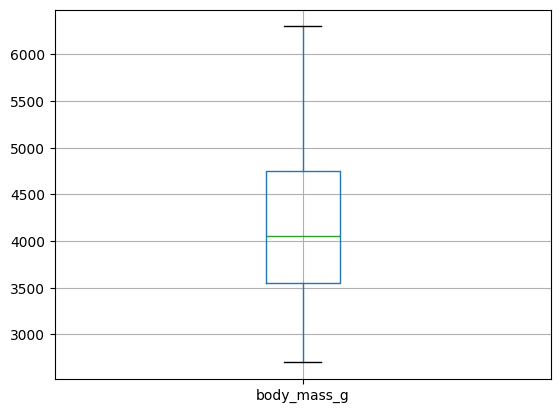

In [46]:
penguins[["body_mass_g"]].boxplot()

<Axes: >

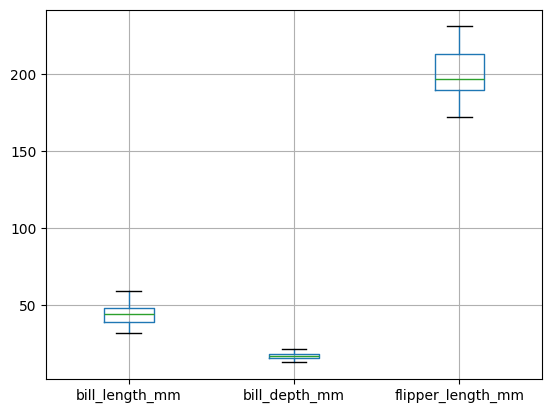

In [47]:
penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm"]].boxplot()

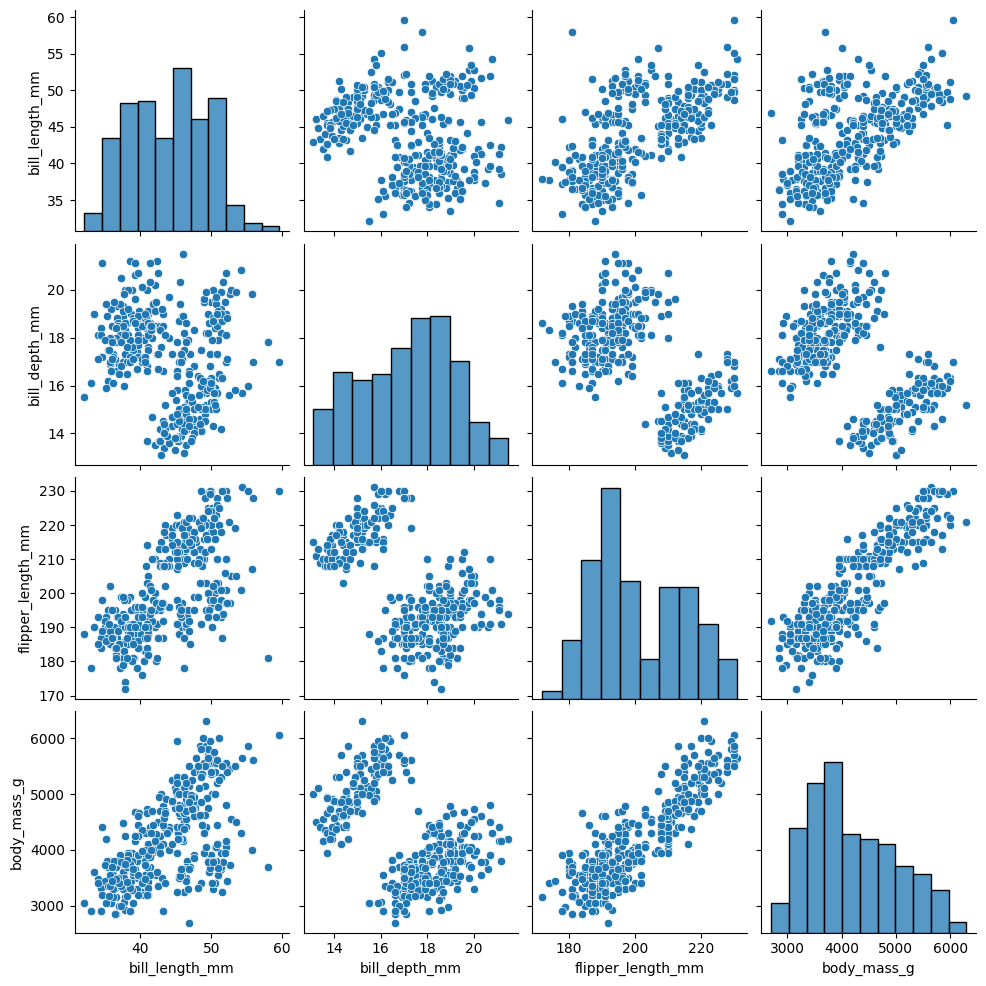

In [48]:
g = sns.pairplot(data=penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]])

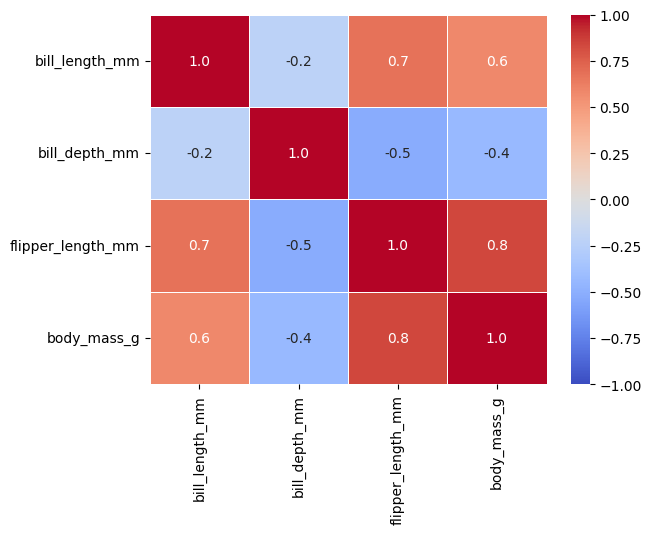

In [49]:
g = sns.heatmap(data = penguins.corr(numeric_only=True, method="spearman"), vmin=-1, vmax=1, annot=True, fmt=".1f", linewidth=.5, cmap='coolwarm')

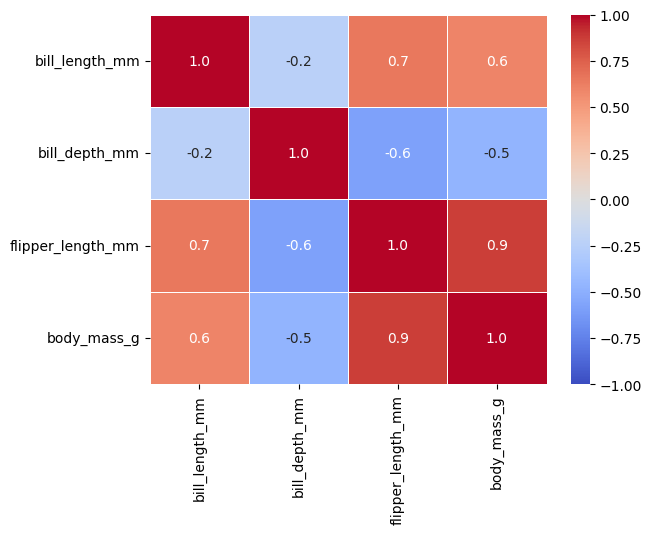

In [50]:
g = sns.heatmap(data = penguins.corr(numeric_only=True, method="pearson"), vmin=-1, vmax=1, annot=True, fmt=".1f", linewidth=.5, cmap='coolwarm')

<b>Conclusioni:</b>

i boxplot e gli istogrammi non mostrano la presenza di outlier significativi. La matrice di correlazione e i box plot mostrano una forte correlazione positiva tra :
- le variabili flipper_length_mm e body_mass_g (lunghezza della pinna e massa corporea)
- leggermente meno accentuata tra flipper_length_mm e bill_length_mm (lunghezza della pinna e lunghezza del becco)

Si potrebbe pensare di effettuare dei test senza la variabile flipper_length_mm

Notiamo invece che (un po' a sorpresa per me) non c'è correlazione tra lunghezza e profondità del becco (bill_length_mm e bill_depth_mm)

## Rappresentare con un opportuno grafico le relazioni tra le variabili species e la lunghezza del becco

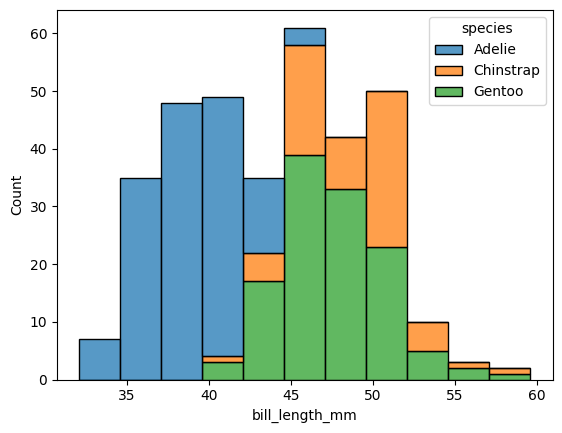

In [51]:
g = sns.histplot(
    data=penguins, x="bill_length_mm", hue="species", multiple="stack"
    )

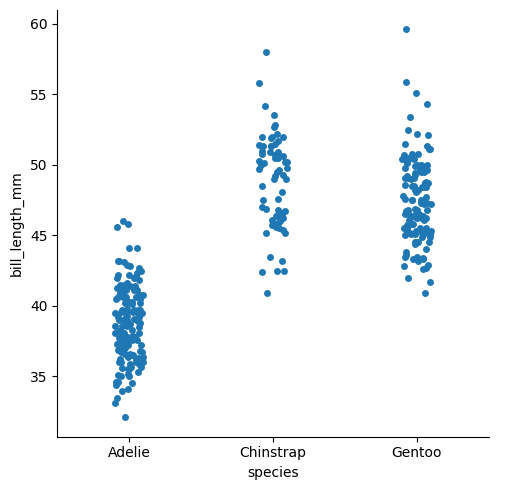

In [52]:
g = sns.catplot(data=penguins, x="species", y="bill_length_mm")

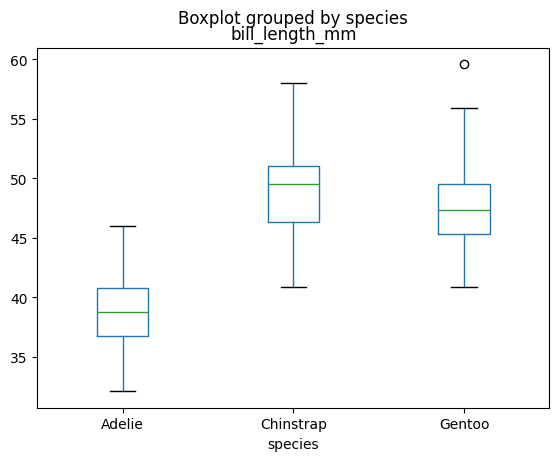

In [53]:
g = penguins.boxplot(by ='species', column =['bill_length_mm'], grid = False)

<b>Conclusioni:</b>

I tre grafici mostrano in modo diverso la stessa conclusione: la lunghezza del becco si distribuisce in modo simile tra Chinstrap e Gentoo, ma in modo significativamente differente tra queste due specie e Adelie. La lunghezza dei becchi di Adelie è generalmente minore (solo Adelie ha becchi lunghi meno di 40mm, nessun Adelie ha becchi oltre 47mm circa, restano dei dubbi soltando in questo intervallo, soprattutto tra 42 e 45).

Questa informazioni è molto importante in quanto può essere combinata a quanto già visto riguardo la relazione tra specie e isola! Chinstrap e Gentoo infatti vivono su isole diverse, all'interno della stessa isola convivono solo con Adelie e tra loro possono essere riconosciuti abbastanza bene dalla lunghezza del becco

## Rappresentare con un opportuno grafico le relazioni tra le variabili species e la profondità del becco

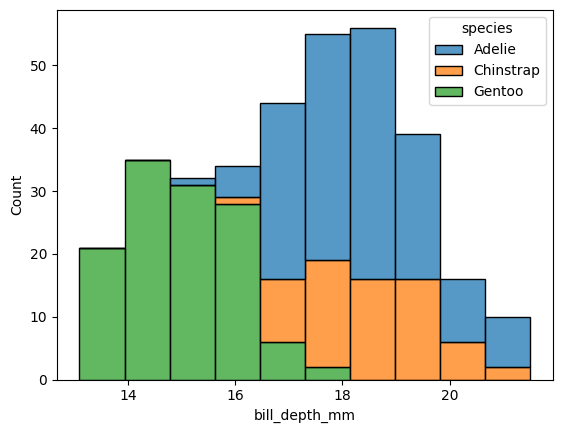

In [54]:
g = sns.histplot(
    data=penguins, x="bill_depth_mm", hue="species", multiple="stack"
    )

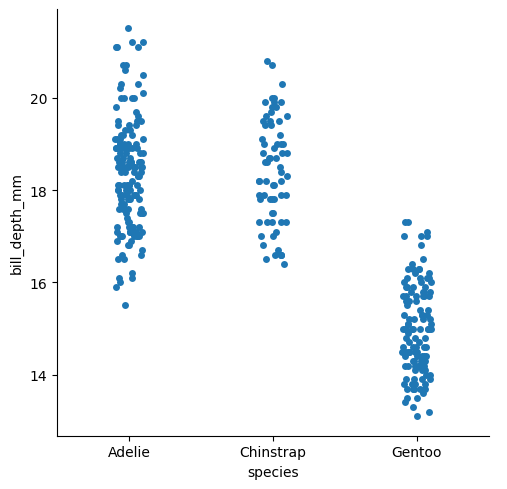

In [55]:
g = sns.catplot(data=penguins, x="species", y="bill_depth_mm")

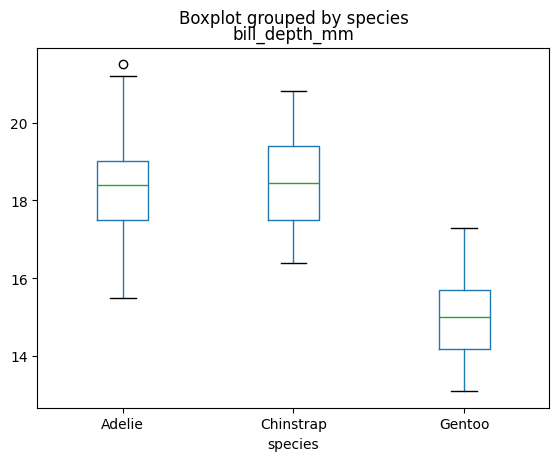

In [56]:
g = penguins.boxplot(by ='species', column =['bill_depth_mm'], grid = False)

<b>Conclusioni:</b>

In questo caso osserviamo che Adelie e Chinstrap hanno becchi di profondità simili, invece i valori per i Gentoo sono generalmente minori. Questo potrebbe dare agli algoritmi di Machine Learning un nuovo criterio di scelta tra le specie Gentoo e Adelie quando la lunghezza dei becchi è tra 40 e 47. Vediamo cosa succede per questo range dove c'era sovrapposizione tra le specie.

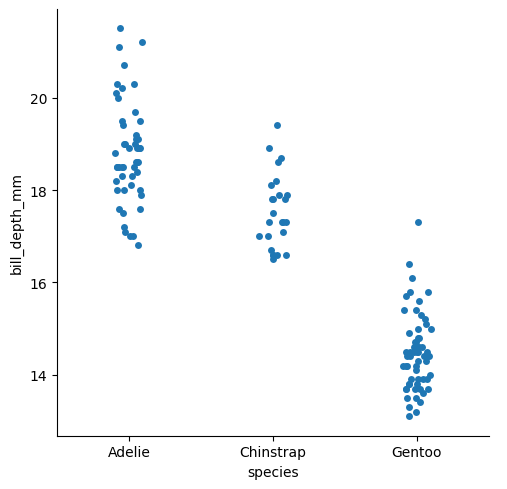

In [57]:
g = sns.catplot(data=penguins.query("bill_length_mm >= 40 and bill_length_mm <=47"), x="species", y="bill_depth_mm")

Osserviamo che la specie Gentoo ha quasi sempre un becco di profondità inferiore